<h1 align="center">Multi Player Perceptron</h1>

## Integrantes

- Josué Say
- Andre Jo

## Repositorio

- [Enlace a GitHub](https://github.com/JosueSay/labs_dl)

## Instalar dependecias 

In [1]:
# %pip install -r requirements.txt

## Red neuronal "manual"

In [2]:
import numpy as np
import altair as alt 
import pandas as pd

In [3]:
def init_parameters(n_features, n_neurons, n_output): 

    np.random.seed(100)
    W1 = np.random.uniform(size = (n_features, n_neurons))
    b1 = 0

    W2 = np.random.uniform(size = (n_neurons, n_output))
    b2 = 0

    return {
        "W1" : W1 
        , "b1" : b1 
        , "W2" : W2
        , "b2" : b2 
    }

Esta función inicializa los parametros para una red neuronal recibiendo la cantidad de entradas que se desea, cantidad de neuronas y las salidas. Dando el caso para la función sort tendriamos como entrada $X_1$ y $X_2$ para una poperación XOR con una salida $Y$, esto indica que pereparamremos una salida con pesos de n_features filas y `n_neurons` columnas, para el caso de bias un matriz de 1 fila y `n_neurons` columnas para el caso de los primeros bias y pesos. para el segundo se hace una preparación similar pero con un orden inverso para que concuerde en la operación de estos valores usando `n_neurons` para filas y `n_output` para columnas y para el bias 1 fila con `n_output` columnas.

In [4]:
def linear_function(W, X, b): 
    return (X @ W)+ b 

Esta función hace la parte lineal de la neurona.

$$
z = \sum_i x_i w_i + b
$$

In [5]:
def sigmoid_func(Z): 
    return 1 / (1 + np.exp(-Z))

Es la función de activación sigmoide, y es la parte no lineal del modelo.

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

In [6]:
def cost_function(A, y):
    return -np.mean(y * np.log10(A) + (1 - y) * np.log10(1 - A))

Esta es la función de pérdida. En un inicio se utilizaba:

1. **MSE (Mean Squared Error)**

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

Mide el error cuadrático medio entre la predicción y la etiqueta real. Es útil en tareas de **regresión**.

Pero fue reemplazada por:

2. **Log Loss o Binary Cross Entropy** (para clasificación binaria):

$$
\text{BCE} = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(p_i) + (1 - y_i)\log(1 - p_i) \right)
$$

Donde:

* $y_i$ es la etiqueta real (0 o 1),
* $p_i$ es la predicción del modelo (la salida de la función sigmoide).


En el código, esta función se implementa con los parámetros:

* `A`: la salida activada del modelo (después de `sigmoid_func`), representa $p_i$,
* `y`: los valores reales de salida.

Estos dos determinan el valor de la pérdida para cada ejemplo, y permiten medir qué tan bien está clasificando la red.

> Nota: se usa base 10 por lo visto en clase.

In [7]:
def predict(X, W1, W2, b1, b2): 
    Z1 = linear_function(W1, X, b1)
    S1 = sigmoid_func(Z1)
    Z2 = linear_function(W2, S1, b2)
    S2 = sigmoid_func(Z2)
    return np.where(S2 >= 0.5, 1, 0)

En esta función se reciben uno o varios valores de entrada `X`, junto con los pesos (`W1`, `W2`) y bias (`b1`, `b2`) de la red neuronal.
Primero, se calcula la salida de la **priemra capa** aplicando una combinación lineal seguida de la función sigmoide. Luego, esa salida se pasa a la **capa final**, donde se repite el mismo proceso.
El resultado es una **probabilidad** (salida entre 0 y 1). Finalmente, se aplica un umbral de 0.5: si la probabilidad es mayor o igual, se predice clase 1; en caso contrario, clase 0.

In [8]:
def fit(X, y, n_features = 2, n_neurons = 3, n_output = 1, iterations = 10, eta = 0.001): 

    params = init_parameters(
        n_features= n_features
        , n_neurons= n_neurons
        , n_output= n_output
    )

    errors = [] 

    for _ in range(iterations): 

        Z1 = linear_function(params['W1'], X, params['b1'])
        S1 = sigmoid_func(Z1)
        Z2 = linear_function(params['W2'], S1, params['b2'])
        S2 = sigmoid_func(Z2)

        error = cost_function(S2, y)
        errors.append(error)

        delta2 = S2 - y
        W2_gradients = S1.T @ delta2 
        params["W2"] = params["W2"] - W2_gradients * eta

        params["b2"] = params["b2"] - np.sum(delta2, axis = 0, keepdims= True) * eta 

        delta1 = (delta2 @ params["W2"].T) * S1 * (1 - S1)
        W1_gradients = X.T @ delta1 
        params["W1"] = params["W1"] - W1_gradients * eta 

        params["b1"] = params["b1"] - np.sum(delta1, axis = 0, keepdims= True) * eta 

    return errors, params 

Esta función es el entrenamiento de la red usando `backpropagation` y dentro de ella están las variables para ajustar al cambiar de `MSE` a `BCE`.


### Paso 1: Definición de la pérdida (BCE)

Para una sola muestra:

$$
E = -\left[ y \cdot \log(a) + (1 - y) \cdot \log(1 - a) \right]
$$

Donde:

* $a = \sigma(z)$ = predicción final (output activado),
* $y$ = valor real.

### Paso 2: Derivada de la BCE respecto a $a$

$$
\frac{\partial E}{\partial a} = -\left( \frac{y}{a} - \frac{1 - y}{1 - a} \right)
$$

### Paso 3: Derivada de la sigmoide $a = \sigma(z)$

$$
\frac{da}{dz} = a(1 - a)
$$

### Paso 4: Regla de la cadena

Ahora aplicamos la regla de la cadena:

$$
\frac{\partial E}{\partial z} = \frac{\partial E}{\partial a} \cdot \frac{da}{dz}
= \left( -\frac{y}{a} + \frac{1 - y}{1 - a} \right) \cdot a(1 - a)
$$

### Paso 5: Simplificación algebraica

Si haces la multiplicación y simplificas algebraicamente (te lo puedo mostrar si quieres), llegas a:

$$
\frac{\partial E}{\partial z} = a - y
$$

Por eso, en código se usa directamente:


$$\text{delta2} = S2 - y$$


In [9]:
y = np.array([[0, 1, 1, 0]]).T 
X = np.array([[0, 0, 1, 1]
              ,[0, 1, 0, 1]]).T 

Se prepara las variables para la función XOR:

| x1 | x2 | y |
| -- | -- | - |
| 0  | 0  | 0 |
| 0  | 1  | 1 |
| 1  | 0  | 1 |
| 1  | 1  | 0 |

In [10]:
errors, params = fit(X, y, iterations=5000, eta = 0.1)

Se llama a la función para entrenar la red neuronal enviando `X`, `y` y los hiperparametros para las iteraciones y la tasa de aprendizaje.

In [11]:
y_pred = predict(X, params["W1"], params["W2"], params["b1"], params["b2"])
num_correct_predictions = (y_pred == y).sum()
accuracy = (num_correct_predictions / y.shape[0]) * 100
print('Multi-layer perceptron accuracy: %.2f%%' % accuracy)
print("Error final:", errors[-1])

Multi-layer perceptron accuracy: 100.00%
Error final: 0.002613467945919712


Aquí se usa la red entrenada para predecir los valores de salida 0 o 1 para las entradas X y se cuenta al final cuantas de las predicciones son correctas para calcular un porcentaje de presición.

In [12]:
alt.data_transformers.disable_max_rows()
df = pd.DataFrame({"errors":errors, "time-step": np.arange(0, len(errors))})
alt.Chart(df).mark_line().encode(x="time-step", y="errors").properties(title='Chart 2')

alt.Chart(...)

0.Se puede observar en la iteración 0 teniamos un error de 0.40 - 0.30 y con más iteraciones nuestra función `log-loss` fue disminuyendo hasta lograr entender el XOR.

## Mismo Dataset en Framework Pytorch

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import altair as alt

In [14]:
# Inputs: XOR problem -> en esta parte al igual que la red neuronal tenemos la variable X & Y para el funcionamiento de XOR
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]]).T  # Shape (4, 2)
y = np.array([[0, 1, 1, 0]]).T  # Shape (4, 1)

# Convert to torch tensors -> es decir el array de pytorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Define the model -> clase edel modelo donde se define la parte lineal (2 capas una con 2 entradas a 16 neuronas y la otra de 16 a 1 neurona) y la no lineal con sigmoide (función de activación)
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x): # Es el equivalente a la función fit en la parte del for donde se calcula Z1, S1, Z2 y S2, es decir la salida de entrenamiento sin actualizar los pesos
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

model = SimpleNet() # Se instancia el modelo

# Loss and optimizer
criterion = nn.BCELoss() # se declara función de pérdida a usar, antes MSE ahora BCELoss
optimizer = optim.Adam(model.parameters()) # esta es equivalente a la parte donde se actualizan los pesos del modelo 

# Training loop -> guardar erores y hacer el train para 3000 iteracioens
errors = []
epochs = 5000

for epoch in range(epochs):
    optimizer.zero_grad()                   # 1. inicia desde cero para toda iteración sin tener en cuenta el acumulado
    outputs = model(X_tensor)               # 2. se optime la salida del modelo
    loss = criterion(outputs, y_tensor)     # 3. calcula la función de pérdida
    loss.backward()                         # 4. se hace backpropagation
    optimizer.step()                        # 5. se actualizan los pesos con el gradiente encontrado en el paso 4
    errors.append(loss.item())              # Se guarda el error

# Convert errors to DataFrame and plot
df2 = pd.DataFrame({"errors": errors, "time-step": np.arange(epochs)})
print("Error final:", errors[-1])

alt.Chart(df2).mark_line().encode(
    x="time-step",
    y="errors"
).properties(title='Chart 3')

Error final: 0.006178715266287327


alt.Chart(...)

## Preguntas

### ¿Existen cambios de arquitectura en las 2 redes implementadas?

- A priori ambas tienen 2 capas y una sigmoide. Pero hay diferencia en neuronas, la neurona "manual" contiene 3 y la de pyTorch tiene 16, la inicialización de la semilla en la neurona "manual" y en pyTorch no. Haciendo que el se inicialicen valores cada vez que se ejecuta el código nuevamente.

- Esto nos hace llegar a que la red puede llegar a ser más complega por tener más neuronas por ende la diferencia entre el tiempo de convergencia y el error alcanzado al final de la ultima iteración. Dado que las iteraciones se acomodaron para hacer las mismas iteraciones la red "manual" tuvo un error en la ultima iteración de **0.0026257273456972174** y el mas bajo alcanzado por la de pyTorch fue de **0.002632427029311657**.

- Sin embargo la facilidad de poder crear una neurona y comenzarla a usar fue más fácil en la de pyTorch ya que este contiene su propio framework ahorrando más tiempo en comparación con la red "manual. Por hacerlo simple, en los cambios de MSE a Log-Loss se colocó la forma manual de esa función así como la versión resumida de la derivada, pero en pyTorch simplemente se busco la función Loss en la libreria.

### ¿Exiten diferencias en la velocidad de convergencia entre las 2 redes?

- Ambas redes convergen y la rapidez en nuestro caso no se noto, solamente por el error final pudo deberse a lo que se menciono anteriormente como una semilla fija y más parámetros.

### En la función init_parameters, ¿qué sucede si inicializamos los pesos en 0 en lugar de valores aleatorios? ¿y los bias?

Si inicializamos el peso en 0 podemos observar que las neuronas solo van a aprender lo mismo. Si se inicializa en 0 solo quedaria el Bias lo cual desfaza para la función de activación. Por otro lado el bias es solo una suma lo cual no afecta tanto el aprendizaje en las neuronas. En cambio, inicializar los bias en cero no afecta negativamente el aprendizaje, ya que estos solo desplazan la función de activación sin interferir en la diversidad de los gradientes. Por eso, aunque el modelo pueda mostrar cierta mejora inicial con pesos en cero, es fundamental iniciar los pesos con valores aleatorios para romper la simetría y permitir un entrenamiento efectivo y una mejor generalización.



*Respuesta*

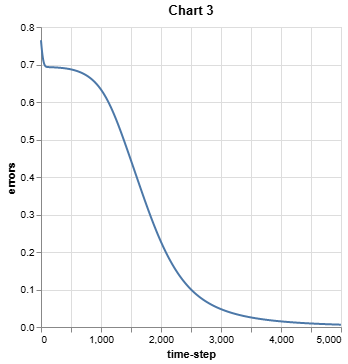

In [18]:
from IPython.display import Image
Image(filename='visualizationbias0.png')


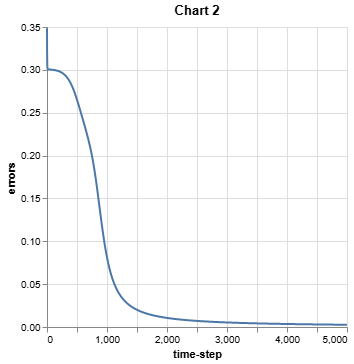

In [17]:
Image(filename='visualizationbias0man.png')